# Preprocessing

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
matches =  pd.read_excel('../data/matches_tableau_extract.xlsx')
players =  pd.read_excel('../data/players_tableau_extract.xlsx')

##### Not enough data for Basketball Champions League

In [3]:
matches.shape

(5818, 41)

In [4]:
matches[matches["Tournament"] != "Basketball Champions League"].shape

(5219, 41)

In [5]:
pd.options.display.max_columns = None
matches.head(5)

,Tournament,Home Team,Away Team,Winner Team,Winner Home Or Away,Match Date,Phase,Round,Home Team Coach,Away Team Coach,Winner Coach,Referee 1,Referee 2,Referee 3,Final Score,Extra Time,Extra Periods,Home Team Full Time Points,Away Team Full Time Points,Home Team Final Points,Away Team Final Points,Home Team Quarter1 Points,Away Team Quarter1 Points,Home Team Quarter2 Points,Away Team Quarter2 Points,Home Team Quarter3 Points,Away Team Quarter3 Points,Home Team Quarter4 Points,Away Team Quarter4 Points,Home Team Extra Time1 Points,Away Team Extra Time1 Points,Home Team Extra Time2 Points,Away Team Extra Time2 Points,Home Team Extra Time3 Points,Away Team Extra Time3 Points,Home Team Extra Time4 Points,Away Team Extra Time4 Points,Home Team Extra Time5 Points,Away Team Extra Time5 Points,Home Team Extra Time6 Points,Away Team Extra Time6 Points
0,Euroleague,Unicaja Malaga,Zielona Gora,Unicaja Malaga,Home,October 25 2013,Regular Season,Round 2,Plaza Joan,Uvalin Mihailo,Plaza Joan,Taurino Paolo,Herceg Sinisa,Vyklicky Robert,101-68,0.0,0.0,101.0,68.0,101.0,68.0,24.0,19.0,31.0,13.0,25.0,20.0,21.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Euroleague,Armani Milano,Zalgiris,Armani Milano,Home,October 24 2013,Regular Season,Round 2,Banchi Luca,Zouros Ilias,Banchi Luca,Ryzhyk Borys,Conde Antonio,Vojinovic Milija,82-75,0.0,0.0,82.0,75.0,82.0,75.0,25.0,19.0,18.0,12.0,20.0,27.0,19.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Euroleague,Real Madrid,Bamberg,Real Madrid,Home,October 24 2013,Regular Season,Round 2,Laso Pablo,Fleming Chris,Laso Pablo,Rocha Fernando,Maestre Nicola,Jasevicius Tomas,98-58,0.0,0.0,98.0,58.0,98.0,58.0,18.0,7.0,24.0,14.0,31.0,18.0,25.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Euroleague,Zielona Gora,Bayern Munich,Bayern Munich,Away,October 18 2013,Regular Season,Round 1,Uvalin Mihailo,Pesic Svetislav,Pesic Svetislav,Ankarali Recep,Koromilas Elias,Lovsin Andrej,73-94,0.0,0.0,73.0,94.0,73.0,94.0,16.0,23.0,12.0,25.0,23.0,18.0,22.0,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Euroleague,Crvena Zvezda,Lokomotiv Kuban,Lokomotiv Kuban,Away,October 17 2013,Regular Season,Round 1,Radonjic Dejan,Pashutin Evgeny,Pashutin Evgeny,Cmikiewicz Marek,Cortes Carlos,Kartal Ersan,84-87,0.0,0.0,84.0,87.0,84.0,87.0,20.0,30.0,22.0,8.0,17.0,20.0,25.0,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
players.head(5)

,Tournament,Home Team,Away Team,Player Team,Opponent Team,Match Date,Starter,Player Number,Player Original Fullname,Player Fullname,Time Played,Points,Two Pointers Made,Two Pointers Attempted,Two Pointers Percenage,Three Pointers Made,Three Pointers Attempted,Three Pointers Percenage,Free Throws Made,Free Throws Attempted,Free Throws Percenage,Offensive Rebounds,Defensive Rebounds,Total Rebounds,Assists,Steals,Turnovers,C,Blocks,Blocks Against,Dunks,Personal Fouls,Fouls Received,Plus Minus,Performance Index
0,Euroleague,Unicaja Malaga,Zielona Gora,Unicaja Malaga,Zielona Gora,October 25 2013,0.0,6,TODOROVIC DEJAN,Todorovic Dejan,00:01:39,0.0,NaN,0.0,NaN,0.0,1.0,0.00000,NaN,0.0,NaN,0.0,1.0,1.0,1.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,1.0
1,Euroleague,Unicaja Malaga,Zielona Gora,Unicaja Malaga,Zielona Gora,October 25 2013,0.0,8,SABONIS DOMANTAS,Sabonis Domantas,00:16:25,2.0,1.0,3.0,0.33333,NaN,0.0,NaN,NaN,0.0,NaN,2.0,3.0,5.0,1.0,0.0,3.0,NaN,0.0,0.0,NaN,2.0,1.0,NaN,2.0
2,Euroleague,Unicaja Malaga,Zielona Gora,Unicaja Malaga,Zielona Gora,October 25 2013,0.0,9,VIDAL SERGI,Vidal Sergi,00:19:49,7.0,NaN,0.0,NaN,1.0,3.0,0.33333,4.0,5.0,0.8,0.0,0.0,0.0,4.0,2.0,0.0,NaN,0.0,0.0,NaN,2.0,2.0,NaN,10.0
3,Euroleague,Unicaja Malaga,Zielona Gora,Unicaja Malaga,Zielona Gora,October 25 2013,1.0,11,CALLOWAY EARL,Calloway Earl,00:19:50,9.0,3.0,4.0,0.75000,1.0,4.0,0.25000,NaN,0.0,NaN,1.0,0.0,1.0,9.0,2.0,1.0,NaN,0.0,0.0,NaN,1.0,2.0,NaN,17.0
4,Euroleague,Unicaja Malaga,Zielona Gora,Unicaja Malaga,Zielona Gora,October 25 2013,0.0,12,SUAREZ CARLOS,Suarez Carlos,00:18:36,5.0,1.0,2.0,0.50000,1.0,4.0,0.25000,NaN,0.0,NaN,3.0,2.0,5.0,1.0,0.0,1.0,NaN,0.0,1.0,NaN,3.0,3.0,NaN,5.0


## Drop all rows or columns with all NaN

In [7]:
matches=matches.dropna(axis=0, how='all')
matches=matches.dropna(axis=1, how='all')

players=players.dropna(axis=0, how='all')
players=players.dropna(axis=1, how='all')

##  Check for NaN

In [8]:
matches.isnull().sum()

Tournament                         0
Home Team                          0
Away Team                          0
Winner Team                       12
Winner Home Or Away               12
Match Date                         0
Phase                           1607
Round                              0
Home Team Coach                 1056
Away Team Coach                 1055
Winner Coach                    1056
Referee 1                        617
Referee 2                        617
Referee 3                        721
Final Score                        0
Extra Time                         0
Extra Periods                      0
Home Team Full Time Points         0
Away Team Full Time Points         0
Home Team Final Points             0
Away Team Final Points             0
Home Team Quarter1 Points          0
Away Team Quarter1 Points          0
Home Team Quarter2 Points          0
Away Team Quarter2 Points          0
Home Team Quarter3 Points          0
Away Team Quarter3 Points          0
H

In [9]:
players.isnull().sum()

Tournament                       0
Home Team                        0
Away Team                        0
Player Team                      0
Opponent Team                    0
Match Date                      47
Starter                      45638
Player Number                19360
Player Original Fullname         0
Player Fullname                  0
Time Played                  13372
Points                       12548
Two Pointers Made            38402
Two Pointers Attempted       12548
Two Pointers Percenage       38402
Three Pointers Made          59795
Three Pointers Attempted     12548
Three Pointers Percenage     59795
Free Throws Made             78083
Free Throws Attempted        12548
Free Throws Percenage        78083
Offensive Rebounds           12541
Defensive Rebounds           12541
Total Rebounds               12541
Assists                      12541
Steals                       12541
Turnovers                    12541
C                           115186
Blocks              

### Unused Row

In [10]:
players2=players[(players['Player Original Fullname'] != 'Team')]

## Unused Column

In [11]:
players2.isnull().sum()

Tournament                       0
Home Team                        0
Away Team                        0
Player Team                      0
Opponent Team                    0
Match Date                      43
Starter                      36060
Player Number                 9782
Player Original Fullname         0
Player Fullname                  0
Time Played                   3794
Points                       12548
Two Pointers Made            28824
Two Pointers Attempted       12548
Two Pointers Percenage       28824
Three Pointers Made          50217
Three Pointers Attempted     12548
Three Pointers Percenage     50217
Free Throws Made             68506
Free Throws Attempted        12548
Free Throws Percenage        68506
Offensive Rebounds           12541
Defensive Rebounds           12541
Total Rebounds               12541
Assists                      12541
Steals                       12541
Turnovers                    12541
C                           108822
Blocks              

In [12]:
players2.drop('Player Number', axis=1, inplace=True)

# Totals

In [13]:
totals=players2[(players2['Player Original Fullname'] == 'Totals')]

In [14]:
totals.columns

Index(['Tournament', 'Home Team', 'Away Team', 'Player Team', 'Opponent Team',
       'Match Date', 'Starter', 'Player Original Fullname', 'Player Fullname',
       'Time Played', 'Points', 'Two Pointers Made', 'Two Pointers Attempted',
       'Two Pointers Percenage', 'Three Pointers Made',
       'Three Pointers Attempted', 'Three Pointers Percenage',
       'Free Throws Made', 'Free Throws Attempted', 'Free Throws Percenage',
       'Offensive Rebounds', 'Defensive Rebounds', 'Total Rebounds', 'Assists',
       'Steals', 'Turnovers', 'C', 'Blocks', 'Blocks Against', 'Dunks',
       'Personal Fouls', 'Fouls Received', 'Plus Minus', 'Performance Index'],
      dtype='object')

In [15]:
totals=totals[['Tournament', 'Home Team', 'Away Team', 'Player Team', 'Opponent Team',
       'Match Date','Points', 'Two Pointers Made', 'Two Pointers Attempted',
       'Two Pointers Percenage', 'Three Pointers Made',
       'Three Pointers Attempted', 'Three Pointers Percenage',
       'Free Throws Made', 'Free Throws Attempted', 'Free Throws Percenage',
       'Offensive Rebounds', 'Defensive Rebounds', 'Total Rebounds', 'Assists',
       'Steals', 'Turnovers', 'Blocks', 'Blocks Against',
       'Personal Fouls', 'Fouls Received', 'Performance Index']]
totals.head(5)

,Tournament,Home Team,Away Team,Player Team,Opponent Team,Match Date,Points,Two Pointers Made,Two Pointers Attempted,Two Pointers Percenage,Three Pointers Made,Three Pointers Attempted,Three Pointers Percenage,Free Throws Made,Free Throws Attempted,Free Throws Percenage,Offensive Rebounds,Defensive Rebounds,Total Rebounds,Assists,Steals,Turnovers,Blocks,Blocks Against,Personal Fouls,Fouls Received,Performance Index
13,Euroleague,Unicaja Malaga,Zielona Gora,Unicaja Malaga,Zielona Gora,October 25 2013,101.0,29.0,48.0,0.604,9.0,23.0,0.391,16.0,25.0,0.640,18.0,23.0,41.0,26.0,8.0,8.0,0.0,2.0,20.0,24.0,128.0
27,Euroleague,Unicaja Malaga,Zielona Gora,Zielona Gora,Unicaja Malaga,October 25 2013,68.0,24.0,40.0,0.600,5.0,20.0,0.250,5.0,14.0,0.357,13.0,16.0,29.0,17.0,0.0,19.0,2.0,0.0,24.0,20.0,53.0
41,Euroleague,Armani Milano,Zalgiris,Armani Milano,Zalgiris,October 24 2013,82.0,23.0,36.0,0.639,9.0,26.0,0.346,9.0,12.0,0.750,12.0,17.0,29.0,16.0,5.0,10.0,0.0,1.0,23.0,23.0,88.0
55,Euroleague,Armani Milano,Zalgiris,Zalgiris,Armani Milano,October 24 2013,75.0,20.0,34.0,0.588,4.0,14.0,0.286,23.0,25.0,0.920,7.0,18.0,25.0,17.0,3.0,13.0,1.0,0.0,23.0,23.0,82.0
69,Euroleague,Real Madrid,Bamberg,Real Madrid,Bamberg,October 24 2013,98.0,25.0,43.0,0.581,11.0,26.0,0.423,15.0,18.0,0.833,17.0,27.0,44.0,19.0,9.0,9.0,7.0,0.0,15.0,21.0,138.0


In [16]:
totals.isnull().sum()

Tournament                     0
Home Team                      0
Away Team                      0
Player Team                    0
Opponent Team                  0
Match Date                     4
Points                         0
Two Pointers Made              0
Two Pointers Attempted         0
Two Pointers Percenage         0
Three Pointers Made            0
Three Pointers Attempted       0
Three Pointers Percenage       0
Free Throws Made               1
Free Throws Attempted          0
Free Throws Percenage          1
Offensive Rebounds             0
Defensive Rebounds             0
Total Rebounds                 0
Assists                        0
Steals                         0
Turnovers                      0
Blocks                         0
Blocks Against              1202
Personal Fouls                 0
Fouls Received              1202
Performance Index              0
dtype: int64

In [17]:
totals=totals.fillna(0)

# Better Data Frames 

In [18]:
df_teams=pd.merge(totals,matches[['Tournament','Home Team','Away Team','Winner Team',
                             'Winner Home Or Away','Match Date','Phase','Final Score','Extra Periods']]
                             ,on=['Tournament','Home Team','Away Team','Match Date'], how='left')
df_teams.head(5)

,Tournament,Home Team,Away Team,Player Team,Opponent Team,Match Date,Points,Two Pointers Made,Two Pointers Attempted,Two Pointers Percenage,Three Pointers Made,Three Pointers Attempted,Three Pointers Percenage,Free Throws Made,Free Throws Attempted,Free Throws Percenage,Offensive Rebounds,Defensive Rebounds,Total Rebounds,Assists,Steals,Turnovers,Blocks,Blocks Against,Personal Fouls,Fouls Received,Performance Index,Winner Team,Winner Home Or Away,Phase,Final Score,Extra Periods
0,Euroleague,Unicaja Malaga,Zielona Gora,Unicaja Malaga,Zielona Gora,October 25 2013,101.0,29.0,48.0,0.604,9.0,23.0,0.391,16.0,25.0,0.640,18.0,23.0,41.0,26.0,8.0,8.0,0.0,2.0,20.0,24.0,128.0,Unicaja Malaga,Home,Regular Season,101-68,0.0
1,Euroleague,Unicaja Malaga,Zielona Gora,Zielona Gora,Unicaja Malaga,October 25 2013,68.0,24.0,40.0,0.600,5.0,20.0,0.250,5.0,14.0,0.357,13.0,16.0,29.0,17.0,0.0,19.0,2.0,0.0,24.0,20.0,53.0,Unicaja Malaga,Home,Regular Season,101-68,0.0
2,Euroleague,Armani Milano,Zalgiris,Armani Milano,Zalgiris,October 24 2013,82.0,23.0,36.0,0.639,9.0,26.0,0.346,9.0,12.0,0.750,12.0,17.0,29.0,16.0,5.0,10.0,0.0,1.0,23.0,23.0,88.0,Armani Milano,Home,Regular Season,82-75,0.0
3,Euroleague,Armani Milano,Zalgiris,Zalgiris,Armani Milano,October 24 2013,75.0,20.0,34.0,0.588,4.0,14.0,0.286,23.0,25.0,0.920,7.0,18.0,25.0,17.0,3.0,13.0,1.0,0.0,23.0,23.0,82.0,Armani Milano,Home,Regular Season,82-75,0.0
4,Euroleague,Real Madrid,Bamberg,Real Madrid,Bamberg,October 24 2013,98.0,25.0,43.0,0.581,11.0,26.0,0.423,15.0,18.0,0.833,17.0,27.0,44.0,19.0,9.0,9.0,7.0,0.0,15.0,21.0,138.0,Real Madrid,Home,Regular Season,98-58,0.0


In [19]:
df_teams.isnull().sum()

Tournament                     0
Home Team                      0
Away Team                      0
Player Team                    0
Opponent Team                  0
Match Date                     0
Points                         0
Two Pointers Made              0
Two Pointers Attempted         0
Two Pointers Percenage         0
Three Pointers Made            0
Three Pointers Attempted       0
Three Pointers Percenage       0
Free Throws Made               0
Free Throws Attempted          0
Free Throws Percenage          0
Offensive Rebounds             0
Defensive Rebounds             0
Total Rebounds                 0
Assists                        0
Steals                         0
Turnovers                      0
Blocks                         0
Blocks Against                 0
Personal Fouls                 0
Fouls Received                 0
Performance Index              0
Winner Team                   28
Winner Home Or Away           28
Phase                       3218
Final Scor

In [20]:
df_teams[df_teams['Final Score'].isnull()]

,Tournament,Home Team,Away Team,Player Team,Opponent Team,Match Date,Points,Two Pointers Made,Two Pointers Attempted,Two Pointers Percenage,Three Pointers Made,Three Pointers Attempted,Three Pointers Percenage,Free Throws Made,Free Throws Attempted,Free Throws Percenage,Offensive Rebounds,Defensive Rebounds,Total Rebounds,Assists,Steals,Turnovers,Blocks,Blocks Against,Personal Fouls,Fouls Received,Performance Index,Winner Team,Winner Home Or Away,Phase,Final Score,Extra Periods
5212,Basketball Champions League,Kataja Basket,Le Mans,Kataja Basket,Le Mans,0,77.0,22.0,45.0,0.48889,8.0,20.0,0.40000,9.0,17.0,0.52941,7.0,29.0,36.0,16.0,8.0,14.0,6.0,0.0,25.0,0.0,5.0,NaN,NaN,NaN,NaN,NaN
5213,Basketball Champions League,Kataja Basket,Le Mans,Le Mans,Kataja Basket,0,76.0,22.0,51.0,0.43137,3.0,15.0,0.20000,23.0,24.0,0.95833,12.0,28.0,40.0,17.0,5.0,16.0,5.0,0.0,22.0,0.0,11.0,NaN,NaN,NaN,NaN,NaN
5504,Basketball Champions League,Nymburk,Bakken Bears,Nymburk,Bakken Bears,0,114.0,27.0,41.0,0.65854,16.0,34.0,0.47059,12.0,17.0,0.70588,17.0,38.0,55.0,25.0,8.0,18.0,3.0,0.0,13.0,0.0,14.0,NaN,NaN,NaN,NaN,NaN
5505,Basketball Champions League,Nymburk,Bakken Bears,Bakken Bears,Nymburk,0,70.0,21.0,49.0,0.42857,7.0,25.0,0.28000,7.0,10.0,0.70000,8.0,16.0,24.0,14.0,10.0,12.0,2.0,0.0,16.0,0.0,6.0,NaN,NaN,NaN,NaN,NaN


In [21]:
df_teams[df_teams['Winner Team'].isnull()].head(5)

,Tournament,Home Team,Away Team,Player Team,Opponent Team,Match Date,Points,Two Pointers Made,Two Pointers Attempted,Two Pointers Percenage,Three Pointers Made,Three Pointers Attempted,Three Pointers Percenage,Free Throws Made,Free Throws Attempted,Free Throws Percenage,Offensive Rebounds,Defensive Rebounds,Total Rebounds,Assists,Steals,Turnovers,Blocks,Blocks Against,Personal Fouls,Fouls Received,Performance Index,Winner Team,Winner Home Or Away,Phase,Final Score,Extra Periods
3844,Eurocup,Rytas Vilnius,Pinar Karsiyaka,Rytas Vilnius,Pinar Karsiyaka,March 04 2015,81.0,21.0,31.0,0.677,6.0,26.0,0.231,21.0,25.0,0.840,10.0,29.0,39.0,18.0,4.0,16.0,3.0,1.0,22.0,24.0,96.0,NaN,NaN,Eighthfinals,81-81,0.0
3845,Eurocup,Rytas Vilnius,Pinar Karsiyaka,Pinar Karsiyaka,Rytas Vilnius,March 04 2015,81.0,21.0,39.0,0.538,9.0,26.0,0.346,12.0,17.0,0.706,7.0,20.0,27.0,15.0,11.0,9.0,1.0,3.0,25.0,22.0,80.0,NaN,NaN,Eighthfinals,81-81,0.0
4472,Eurocup,Alba Berlin,Bayern Munich,Alba Berlin,Bayern Munich,February 24 2016,82.0,24.0,35.0,0.686,4.0,18.0,0.222,22.0,27.0,0.815,9.0,16.0,25.0,21.0,9.0,17.0,1.0,1.0,24.0,24.0,90.0,NaN,NaN,Eighthfinals,82-82,0.0
4473,Eurocup,Alba Berlin,Bayern Munich,Bayern Munich,Alba Berlin,February 24 2016,82.0,19.0,38.0,0.500,7.0,17.0,0.412,23.0,26.0,0.885,10.0,16.0,26.0,15.0,7.0,18.0,1.0,1.0,24.0,23.0,79.0,NaN,NaN,Eighthfinals,82-82,0.0
4514,Eurocup,Strasbourg,Nizhny Novgorod,Strasbourg,Nizhny Novgorod,March 23 2016,91.0,26.0,49.0,0.531,8.0,34.0,0.235,15.0,21.0,0.714,17.0,24.0,41.0,26.0,14.0,13.0,6.0,1.0,24.0,23.0,108.0,NaN,NaN,Quarterfinals,91-91,2.0


In [22]:
df_teams['Winner Team'].loc[df_teams['Winner Team'].isnull()]="draw"
df_teams['Winner Home Or Away'].loc[df_teams['Winner Home Or Away'].isnull()]="draw"
df_teams=df_teams[(df_teams['Winner Team']!="draw") & (df_teams["Tournament"]!="Basketball Champions League")]

In [23]:
df_teams['Phase'].unique()

array(['Regular Season', 'Top 16', 'Playoffs', 'Final Four', 'Last 32',
       'Eighthfinals', 'Quarterfinals', 'Semifinals', 'Finals',
       'Κανονική Περίοδος', nan], dtype=object)

In [24]:
df_teams['Phase'].loc[df_teams['Phase']=='Κανονική Περίοδος']='Regular Season'
df_teams['Phase'].loc[(df_teams['Phase']=='Quarterfinals') | (df_teams['Phase']=='Eighthfinals')]='Quarter-Finals'


In [25]:
df_teams['Phase'].unique()

array(['Regular Season', 'Top 16', 'Playoffs', 'Final Four', 'Last 32',
       'Quarter-Finals', 'Semifinals', 'Finals', nan], dtype=object)

In [26]:
df_teams[(df_teams['Phase'].isnull()) & (df_teams['Tournament']!="Liga ACB")]

,Tournament,Home Team,Away Team,Player Team,Opponent Team,Match Date,Points,Two Pointers Made,Two Pointers Attempted,Two Pointers Percenage,Three Pointers Made,Three Pointers Attempted,Three Pointers Percenage,Free Throws Made,Free Throws Attempted,Free Throws Percenage,Offensive Rebounds,Defensive Rebounds,Total Rebounds,Assists,Steals,Turnovers,Blocks,Blocks Against,Personal Fouls,Fouls Received,Performance Index,Winner Team,Winner Home Or Away,Phase,Final Score,Extra Periods


In [27]:
df_teams['Match Date']=pd.to_datetime(df_teams['Match Date'])

In [28]:
df_teams['Phase'].loc[((df_teams['Match Date']>="2014-05-29") & (df_teams['Match Date']<"2014-07-01")) & (df_teams['Tournament']=="Liga ACB")]="Playoffs"
df_teams['Phase'].loc[(df_teams['Match Date']>"2013-08-29") & (df_teams['Match Date']<"2014-05-29") & (df_teams['Tournament']=="Liga ACB")]="Regular Season"

In [29]:
df_teams['Phase'].loc[((df_teams['Match Date']>="2015-05-28") & (df_teams['Match Date']<"2015-07-01")) & (df_teams['Tournament']=="Liga ACB")]="Playoffs"
df_teams['Phase'].loc[(df_teams['Match Date']>"2014-08-29") & (df_teams['Match Date']<"2015-05-28") & (df_teams['Tournament']=="Liga ACB")]="Regular Season"

In [30]:
df_teams['Phase'].loc[((df_teams['Match Date']>="2016-05-28") & (df_teams['Match Date']<"2016-07-01")) & (df_teams['Tournament']=="Liga ACB")]="Playoffs"
df_teams['Phase'].loc[(df_teams['Match Date']>"2015-08-29") & (df_teams['Match Date']<"2016-05-28") & (df_teams['Tournament']=="Liga ACB")]="Regular Season"

In [31]:
df_teams['Phase'].loc[((df_teams['Match Date']>="2017-05-20") & (df_teams['Match Date']<"2017-07-01")) & (df_teams['Tournament']=="Liga ACB")]="Playoffs"
df_teams['Phase'].loc[(df_teams['Match Date']>"2016-08-29") & (df_teams['Match Date']<"2017-05-20") & (df_teams['Tournament']=="Liga ACB")]="Regular Season"

In [32]:
df_teams['Phase'].loc[((df_teams['Match Date']>="2018-05-27") & (df_teams['Match Date']<"2018-07-01")) & (df_teams['Tournament']=="Liga ACB")]="Playoffs"
df_teams['Phase'].loc[(df_teams['Match Date']>"2017-08-29") & (df_teams['Match Date']<"2018-05-27") & (df_teams['Tournament']=="Liga ACB")]="Regular Season"

In [33]:
#df_teams['Phase'].loc[(df_teams['Match Date'].dt.month!=6) & (df_teams['Tournament']=="Liga ACB")]="Regular Season"
#df_teams['Phase'].loc[(df_teams['Match Date'].dt.month==6) & (df_teams['Tournament']=="Liga ACB")]="Playoffs"

In [34]:
df_teams.isnull().sum()

Tournament                  0
Home Team                   0
Away Team                   0
Player Team                 0
Opponent Team               0
Match Date                  0
Points                      0
Two Pointers Made           0
Two Pointers Attempted      0
Two Pointers Percenage      0
Three Pointers Made         0
Three Pointers Attempted    0
Three Pointers Percenage    0
Free Throws Made            0
Free Throws Attempted       0
Free Throws Percenage       0
Offensive Rebounds          0
Defensive Rebounds          0
Total Rebounds              0
Assists                     0
Steals                      0
Turnovers                   0
Blocks                      0
Blocks Against              0
Personal Fouls              0
Fouls Received              0
Performance Index           0
Winner Team                 0
Winner Home Or Away         0
Phase                       0
Final Score                 0
Extra Periods               0
dtype: int64

In [35]:
totals1=pd.merge(df_teams.iloc[::2],df_teams.iloc[1::2],on=['Tournament','Home Team', 'Away Team','Match Date','Winner Team','Winner Home Or Away','Phase','Final Score','Extra Periods'])
#totals2=pd.merge(df_teams.iloc[1::2],df_teams.iloc[::2],on=['Tournament','Home Team', 'Away Team','Match Date','Winner Team','Winner Home Or Away','Phase','Final Score','Extra Periods'])
#final_totals=pd.concat([totals1,totals2])
final_totals=totals1
final_totals.head(5)

,Tournament,Home Team,Away Team,Player Team_x,Opponent Team_x,Match Date,Points_x,Two Pointers Made_x,Two Pointers Attempted_x,Two Pointers Percenage_x,Three Pointers Made_x,Three Pointers Attempted_x,Three Pointers Percenage_x,Free Throws Made_x,Free Throws Attempted_x,Free Throws Percenage_x,Offensive Rebounds_x,Defensive Rebounds_x,Total Rebounds_x,Assists_x,Steals_x,Turnovers_x,Blocks_x,Blocks Against_x,Personal Fouls_x,Fouls Received_x,Performance Index_x,Winner Team,Winner Home Or Away,Phase,Final Score,Extra Periods,Player Team_y,Opponent Team_y,Points_y,Two Pointers Made_y,Two Pointers Attempted_y,Two Pointers Percenage_y,Three Pointers Made_y,Three Pointers Attempted_y,Three Pointers Percenage_y,Free Throws Made_y,Free Throws Attempted_y,Free Throws Percenage_y,Offensive Rebounds_y,Defensive Rebounds_y,Total Rebounds_y,Assists_y,Steals_y,Turnovers_y,Blocks_y,Blocks Against_y,Personal Fouls_y,Fouls Received_y,Performance Index_y
0,Euroleague,Unicaja Malaga,Zielona Gora,Unicaja Malaga,Zielona Gora,2013-10-25,101.0,29.0,48.0,0.604,9.0,23.0,0.391,16.0,25.0,0.640,18.0,23.0,41.0,26.0,8.0,8.0,0.0,2.0,20.0,24.0,128.0,Unicaja Malaga,Home,Regular Season,101-68,0.0,Zielona Gora,Unicaja Malaga,68.0,24.0,40.0,0.600,5.0,20.0,0.250,5.0,14.0,0.357,13.0,16.0,29.0,17.0,0.0,19.0,2.0,0.0,24.0,20.0,53.0
1,Euroleague,Armani Milano,Zalgiris,Armani Milano,Zalgiris,2013-10-24,82.0,23.0,36.0,0.639,9.0,26.0,0.346,9.0,12.0,0.750,12.0,17.0,29.0,16.0,5.0,10.0,0.0,1.0,23.0,23.0,88.0,Armani Milano,Home,Regular Season,82-75,0.0,Zalgiris,Armani Milano,75.0,20.0,34.0,0.588,4.0,14.0,0.286,23.0,25.0,0.920,7.0,18.0,25.0,17.0,3.0,13.0,1.0,0.0,23.0,23.0,82.0
2,Euroleague,Real Madrid,Bamberg,Real Madrid,Bamberg,2013-10-24,98.0,25.0,43.0,0.581,11.0,26.0,0.423,15.0,18.0,0.833,17.0,27.0,44.0,19.0,9.0,9.0,7.0,0.0,15.0,21.0,138.0,Real Madrid,Home,Regular Season,98-58,0.0,Bamberg,Real Madrid,58.0,12.0,34.0,0.353,9.0,29.0,0.310,7.0,8.0,0.875,14.0,16.0,30.0,12.0,2.0,17.0,0.0,7.0,21.0,15.0,29.0
3,Euroleague,Zielona Gora,Bayern Munich,Zielona Gora,Bayern Munich,2013-10-18,73.0,20.0,36.0,0.556,8.0,25.0,0.320,9.0,11.0,0.818,12.0,20.0,32.0,16.0,1.0,18.0,4.0,1.0,22.0,19.0,69.0,Bayern Munich,Away,Regular Season,73-94,0.0,Bayern Munich,Zielona Gora,94.0,31.0,51.0,0.608,6.0,21.0,0.286,14.0,17.0,0.824,14.0,22.0,36.0,21.0,8.0,7.0,1.0,4.0,19.0,22.0,114.0
4,Euroleague,Crvena Zvezda,Lokomotiv Kuban,Crvena Zvezda,Lokomotiv Kuban,2013-10-17,84.0,23.0,52.0,0.442,8.0,19.0,0.421,14.0,19.0,0.737,12.0,28.0,40.0,13.0,4.0,12.0,1.0,2.0,26.0,23.0,80.0,Lokomotiv Kuban,Away,Regular Season,84-87,0.0,Lokomotiv Kuban,Crvena Zvezda,87.0,23.0,39.0,0.590,7.0,16.0,0.438,20.0,34.0,0.588,5.0,28.0,33.0,22.0,5.0,12.0,2.0,1.0,23.0,26.0,100.0


In [36]:
final_totals.columns

Index(['Tournament', 'Home Team', 'Away Team', 'Player Team_x',
       'Opponent Team_x', 'Match Date', 'Points_x', 'Two Pointers Made_x',
       'Two Pointers Attempted_x', 'Two Pointers Percenage_x',
       'Three Pointers Made_x', 'Three Pointers Attempted_x',
       'Three Pointers Percenage_x', 'Free Throws Made_x',
       'Free Throws Attempted_x', 'Free Throws Percenage_x',
       'Offensive Rebounds_x', 'Defensive Rebounds_x', 'Total Rebounds_x',
       'Assists_x', 'Steals_x', 'Turnovers_x', 'Blocks_x', 'Blocks Against_x',
       'Personal Fouls_x', 'Fouls Received_x', 'Performance Index_x',
       'Winner Team', 'Winner Home Or Away', 'Phase', 'Final Score',
       'Extra Periods', 'Player Team_y', 'Opponent Team_y', 'Points_y',
       'Two Pointers Made_y', 'Two Pointers Attempted_y',
       'Two Pointers Percenage_y', 'Three Pointers Made_y',
       'Three Pointers Attempted_y', 'Three Pointers Percenage_y',
       'Free Throws Made_y', 'Free Throws Attempted_y',
       'Fr

In [37]:
final_totals.drop('Player Team_y', axis=1, inplace=True)
final_totals.drop('Opponent Team_y', axis=1, inplace=True)


final_totals.columns = ['Tournament','Home Team', 'Away Team', 'Team',
       'Opponent Team', 'Match Date', 'Team Points', 'Team Two Pointers Made',
       'Team Two Pointers Attempted', 'Team Two Pointers Percenage',
       'Team Three Pointers Made', 'Team Three Pointers Attempted',
       'Team Three Pointers Percenage', 'Team Free Throws Made',
       'Team Free Throws Attempted', 'Team Free Throws Percenage',
       'Team Offensive Rebounds', 'Team Defensive Rebounds', 'Team Total Rebounds',
       'Team Assists', 'Team Steals', 'Team Turnovers', 'Team Blocks', 'Team Blocks Against',
       'Team Personal Fouls', 'Team Fouls Received', 'Team Performance Index',
       'Winner Team', 'Winner Home Or Away', 'Phase', 'Final Score',
       'Extra Periods', 'Opponent Points',
       'Opponent Two Pointers Made', 'Opponent Two Pointers Attempted',
       'Opponent Two Pointers Percenage', 'Opponent Three Pointers Made',
       'Opponent Three Pointers Attempted', 'Opponent Three Pointers Percenage',
       'Opponent Free Throws Made', 'Opponent Free Throws Attempted',
       'Opponent Free Throws Percenage', 'Opponent Offensive Rebounds',
       'Opponent Defensive Rebounds', 'Opponent Total Rebounds', 'Opponent Assists', 'Opponent Steals',
       'Opponent Turnovers', 'Opponent Blocks', 'Opponent Blocks Against', 'Opponent Personal Fouls',
       'Opponent Fouls Received', 'Opponent Performance Index']

final_totals.head(5)

,Tournament,Home Team,Away Team,Team,Opponent Team,Match Date,Team Points,Team Two Pointers Made,Team Two Pointers Attempted,Team Two Pointers Percenage,Team Three Pointers Made,Team Three Pointers Attempted,Team Three Pointers Percenage,Team Free Throws Made,Team Free Throws Attempted,Team Free Throws Percenage,Team Offensive Rebounds,Team Defensive Rebounds,Team Total Rebounds,Team Assists,Team Steals,Team Turnovers,Team Blocks,Team Blocks Against,Team Personal Fouls,Team Fouls Received,Team Performance Index,Winner Team,Winner Home Or Away,Phase,Final Score,Extra Periods,Opponent Points,Opponent Two Pointers Made,Opponent Two Pointers Attempted,Opponent Two Pointers Percenage,Opponent Three Pointers Made,Opponent Three Pointers Attempted,Opponent Three Pointers Percenage,Opponent Free Throws Made,Opponent Free Throws Attempted,Opponent Free Throws Percenage,Opponent Offensive Rebounds,Opponent Defensive Rebounds,Opponent Total Rebounds,Opponent Assists,Opponent Steals,Opponent Turnovers,Opponent Blocks,Opponent Blocks Against,Opponent Personal Fouls,Opponent Fouls Received,Opponent Performance Index
0,Euroleague,Unicaja Malaga,Zielona Gora,Unicaja Malaga,Zielona Gora,2013-10-25,101.0,29.0,48.0,0.604,9.0,23.0,0.391,16.0,25.0,0.640,18.0,23.0,41.0,26.0,8.0,8.0,0.0,2.0,20.0,24.0,128.0,Unicaja Malaga,Home,Regular Season,101-68,0.0,68.0,24.0,40.0,0.600,5.0,20.0,0.250,5.0,14.0,0.357,13.0,16.0,29.0,17.0,0.0,19.0,2.0,0.0,24.0,20.0,53.0
1,Euroleague,Armani Milano,Zalgiris,Armani Milano,Zalgiris,2013-10-24,82.0,23.0,36.0,0.639,9.0,26.0,0.346,9.0,12.0,0.750,12.0,17.0,29.0,16.0,5.0,10.0,0.0,1.0,23.0,23.0,88.0,Armani Milano,Home,Regular Season,82-75,0.0,75.0,20.0,34.0,0.588,4.0,14.0,0.286,23.0,25.0,0.920,7.0,18.0,25.0,17.0,3.0,13.0,1.0,0.0,23.0,23.0,82.0
2,Euroleague,Real Madrid,Bamberg,Real Madrid,Bamberg,2013-10-24,98.0,25.0,43.0,0.581,11.0,26.0,0.423,15.0,18.0,0.833,17.0,27.0,44.0,19.0,9.0,9.0,7.0,0.0,15.0,21.0,138.0,Real Madrid,Home,Regular Season,98-58,0.0,58.0,12.0,34.0,0.353,9.0,29.0,0.310,7.0,8.0,0.875,14.0,16.0,30.0,12.0,2.0,17.0,0.0,7.0,21.0,15.0,29.0
3,Euroleague,Zielona Gora,Bayern Munich,Zielona Gora,Bayern Munich,2013-10-18,73.0,20.0,36.0,0.556,8.0,25.0,0.320,9.0,11.0,0.818,12.0,20.0,32.0,16.0,1.0,18.0,4.0,1.0,22.0,19.0,69.0,Bayern Munich,Away,Regular Season,73-94,0.0,94.0,31.0,51.0,0.608,6.0,21.0,0.286,14.0,17.0,0.824,14.0,22.0,36.0,21.0,8.0,7.0,1.0,4.0,19.0,22.0,114.0
4,Euroleague,Crvena Zvezda,Lokomotiv Kuban,Crvena Zvezda,Lokomotiv Kuban,2013-10-17,84.0,23.0,52.0,0.442,8.0,19.0,0.421,14.0,19.0,0.737,12.0,28.0,40.0,13.0,4.0,12.0,1.0,2.0,26.0,23.0,80.0,Lokomotiv Kuban,Away,Regular Season,84-87,0.0,87.0,23.0,39.0,0.590,7.0,16.0,0.438,20.0,34.0,0.588,5.0,28.0,33.0,22.0,5.0,12.0,2.0,1.0,23.0,26.0,100.0


In [38]:
final_totals = final_totals[['Tournament','Home Team', 'Away Team','Match Date','Winner Team', 'Winner Home Or Away', 'Phase',
        'Final Score','Extra Periods', 'Team','Opponent Team', 
        'Team Points', 'Team Two Pointers Made','Team Two Pointers Attempted','Team Two Pointers Percenage',
       'Team Three Pointers Made', 'Team Three Pointers Attempted',
       'Team Three Pointers Percenage', 'Team Free Throws Made',
       'Team Free Throws Attempted', 'Team Free Throws Percenage',
       'Team Offensive Rebounds', 'Team Defensive Rebounds', 'Team Total Rebounds',
       'Team Assists', 'Team Steals', 'Team Turnovers', 'Team Blocks', 'Team Blocks Against',
       'Team Personal Fouls', 'Team Fouls Received', 'Team Performance Index', 'Opponent Points',
       'Opponent Two Pointers Made', 'Opponent Two Pointers Attempted',
       'Opponent Two Pointers Percenage', 'Opponent Three Pointers Made',
       'Opponent Three Pointers Attempted', 'Opponent Three Pointers Percenage',
       'Opponent Free Throws Made', 'Opponent Free Throws Attempted',
       'Opponent Free Throws Percenage', 'Opponent Offensive Rebounds',
       'Opponent Defensive Rebounds', 'Opponent Total Rebounds', 'Opponent Assists', 'Opponent Steals',
       'Opponent Turnovers', 'Opponent Blocks', 'Opponent Blocks Against', 'Opponent Personal Fouls',
       'Opponent Fouls Received', 'Opponent Performance Index']]
final_totals.head(5)

,Tournament,Home Team,Away Team,Match Date,Winner Team,Winner Home Or Away,Phase,Final Score,Extra Periods,Team,Opponent Team,Team Points,Team Two Pointers Made,Team Two Pointers Attempted,Team Two Pointers Percenage,Team Three Pointers Made,Team Three Pointers Attempted,Team Three Pointers Percenage,Team Free Throws Made,Team Free Throws Attempted,Team Free Throws Percenage,Team Offensive Rebounds,Team Defensive Rebounds,Team Total Rebounds,Team Assists,Team Steals,Team Turnovers,Team Blocks,Team Blocks Against,Team Personal Fouls,Team Fouls Received,Team Performance Index,Opponent Points,Opponent Two Pointers Made,Opponent Two Pointers Attempted,Opponent Two Pointers Percenage,Opponent Three Pointers Made,Opponent Three Pointers Attempted,Opponent Three Pointers Percenage,Opponent Free Throws Made,Opponent Free Throws Attempted,Opponent Free Throws Percenage,Opponent Offensive Rebounds,Opponent Defensive Rebounds,Opponent Total Rebounds,Opponent Assists,Opponent Steals,Opponent Turnovers,Opponent Blocks,Opponent Blocks Against,Opponent Personal Fouls,Opponent Fouls Received,Opponent Performance Index
0,Euroleague,Unicaja Malaga,Zielona Gora,2013-10-25,Unicaja Malaga,Home,Regular Season,101-68,0.0,Unicaja Malaga,Zielona Gora,101.0,29.0,48.0,0.604,9.0,23.0,0.391,16.0,25.0,0.640,18.0,23.0,41.0,26.0,8.0,8.0,0.0,2.0,20.0,24.0,128.0,68.0,24.0,40.0,0.600,5.0,20.0,0.250,5.0,14.0,0.357,13.0,16.0,29.0,17.0,0.0,19.0,2.0,0.0,24.0,20.0,53.0
1,Euroleague,Armani Milano,Zalgiris,2013-10-24,Armani Milano,Home,Regular Season,82-75,0.0,Armani Milano,Zalgiris,82.0,23.0,36.0,0.639,9.0,26.0,0.346,9.0,12.0,0.750,12.0,17.0,29.0,16.0,5.0,10.0,0.0,1.0,23.0,23.0,88.0,75.0,20.0,34.0,0.588,4.0,14.0,0.286,23.0,25.0,0.920,7.0,18.0,25.0,17.0,3.0,13.0,1.0,0.0,23.0,23.0,82.0
2,Euroleague,Real Madrid,Bamberg,2013-10-24,Real Madrid,Home,Regular Season,98-58,0.0,Real Madrid,Bamberg,98.0,25.0,43.0,0.581,11.0,26.0,0.423,15.0,18.0,0.833,17.0,27.0,44.0,19.0,9.0,9.0,7.0,0.0,15.0,21.0,138.0,58.0,12.0,34.0,0.353,9.0,29.0,0.310,7.0,8.0,0.875,14.0,16.0,30.0,12.0,2.0,17.0,0.0,7.0,21.0,15.0,29.0
3,Euroleague,Zielona Gora,Bayern Munich,2013-10-18,Bayern Munich,Away,Regular Season,73-94,0.0,Zielona Gora,Bayern Munich,73.0,20.0,36.0,0.556,8.0,25.0,0.320,9.0,11.0,0.818,12.0,20.0,32.0,16.0,1.0,18.0,4.0,1.0,22.0,19.0,69.0,94.0,31.0,51.0,0.608,6.0,21.0,0.286,14.0,17.0,0.824,14.0,22.0,36.0,21.0,8.0,7.0,1.0,4.0,19.0,22.0,114.0
4,Euroleague,Crvena Zvezda,Lokomotiv Kuban,2013-10-17,Lokomotiv Kuban,Away,Regular Season,84-87,0.0,Crvena Zvezda,Lokomotiv Kuban,84.0,23.0,52.0,0.442,8.0,19.0,0.421,14.0,19.0,0.737,12.0,28.0,40.0,13.0,4.0,12.0,1.0,2.0,26.0,23.0,80.0,87.0,23.0,39.0,0.590,7.0,16.0,0.438,20.0,34.0,0.588,5.0,28.0,33.0,22.0,5.0,12.0,2.0,1.0,23.0,26.0,100.0


In [39]:
sorted_final_totals=final_totals.sort_values(by='Match Date')
sorted_final_totals.head(5)

,Tournament,Home Team,Away Team,Match Date,Winner Team,Winner Home Or Away,Phase,Final Score,Extra Periods,Team,Opponent Team,Team Points,Team Two Pointers Made,Team Two Pointers Attempted,Team Two Pointers Percenage,Team Three Pointers Made,Team Three Pointers Attempted,Team Three Pointers Percenage,Team Free Throws Made,Team Free Throws Attempted,Team Free Throws Percenage,Team Offensive Rebounds,Team Defensive Rebounds,Team Total Rebounds,Team Assists,Team Steals,Team Turnovers,Team Blocks,Team Blocks Against,Team Personal Fouls,Team Fouls Received,Team Performance Index,Opponent Points,Opponent Two Pointers Made,Opponent Two Pointers Attempted,Opponent Two Pointers Percenage,Opponent Three Pointers Made,Opponent Three Pointers Attempted,Opponent Three Pointers Percenage,Opponent Free Throws Made,Opponent Free Throws Attempted,Opponent Free Throws Percenage,Opponent Offensive Rebounds,Opponent Defensive Rebounds,Opponent Total Rebounds,Opponent Assists,Opponent Steals,Opponent Turnovers,Opponent Blocks,Opponent Blocks Against,Opponent Personal Fouls,Opponent Fouls Received,Opponent Performance Index
2600,Basket League,KAOD,Aris,2013-10-12,Aris,Away,Regular Season,58-66,0.0,KAOD,Aris,58.0,20.0,43.0,0.46512,1.0,10.0,0.10000,15.0,26.0,0.57692,12.0,22.0,34.0,6.0,6.0,17.0,3.0,3.0,22.0,22.0,40.0,66.0,15.0,33.0,0.45455,9.0,23.0,0.39130,9.0,19.0,0.47368,10.0,18.0,28.0,11.0,8.0,14.0,3.0,3.0,22.0,22.0,57.0
2578,Basket League,PAOK,Kolossos Rhodes,2013-10-12,PAOK,Home,Regular Season,88-81,0.0,PAOK,Kolossos Rhodes,88.0,17.0,35.0,0.48571,10.0,26.0,0.38462,24.0,26.0,0.92308,9.0,22.0,31.0,22.0,7.0,18.0,3.0,1.0,23.0,23.0,96.0,81.0,26.0,42.0,0.61905,5.0,16.0,0.31250,14.0,21.0,0.66667,6.0,25.0,31.0,5.0,8.0,18.0,1.0,3.0,24.0,22.0,69.0
3607,Liga ACB,Bilbao,Zaragoza,2013-10-12,Zaragoza,Away,Regular Season,77-86,0.0,Bilbao,Zaragoza,77.0,24.0,46.0,0.52000,5.0,12.0,0.42000,14.0,20.0,0.70000,13.0,19.0,32.0,15.0,7.0,12.0,1.0,1.0,18.0,23.0,89.0,86.0,25.0,39.0,0.64000,10.0,23.0,0.43000,6.0,10.0,0.60000,9.0,20.0,29.0,16.0,10.0,10.0,1.0,1.0,23.0,18.0,95.0
2580,Basket League,Trikala,Kifisia,2013-10-12,Kifisia,Away,Regular Season,64-69,0.0,Trikala,Kifisia,64.0,21.0,41.0,0.51220,5.0,14.0,0.35714,7.0,18.0,0.38889,9.0,19.0,27.0,15.0,5.0,15.0,3.0,0.0,23.0,24.0,62.0,69.0,14.0,28.0,0.50000,9.0,28.0,0.32143,14.0,23.0,0.60870,11.0,22.0,33.0,17.0,4.0,16.0,0.0,3.0,24.0,23.0,62.0
3613,Liga ACB,Tenerife,Obradoiro,2013-10-12,Tenerife,Home,Regular Season,76-74,0.0,Tenerife,Obradoiro,76.0,12.0,30.0,0.40000,11.0,21.0,0.52000,19.0,25.0,0.76000,7.0,22.0,29.0,12.0,13.0,18.0,2.0,0.0,20.0,27.0,87.0,74.0,15.0,36.0,0.42000,9.0,22.0,0.41000,17.0,23.0,0.74000,14.0,25.0,39.0,15.0,12.0,21.0,0.0,2.0,27.0,20.0,70.0


In [40]:
sorted_final_totals.loc[sorted_final_totals["Winner Team"]=="draw", "Team Result"] = 2
sorted_final_totals.loc[sorted_final_totals["Team"]==sorted_final_totals["Winner Team"], "Team Result"] = 1 
sorted_final_totals.loc[(sorted_final_totals["Team"]!=sorted_final_totals["Winner Team"]) & (sorted_final_totals["Winner Team"]!="draw"), "Team Result"] = 0
sorted_final_totals.head(5)

,Tournament,Home Team,Away Team,Match Date,Winner Team,Winner Home Or Away,Phase,Final Score,Extra Periods,Team,Opponent Team,Team Points,Team Two Pointers Made,Team Two Pointers Attempted,Team Two Pointers Percenage,Team Three Pointers Made,Team Three Pointers Attempted,Team Three Pointers Percenage,Team Free Throws Made,Team Free Throws Attempted,Team Free Throws Percenage,Team Offensive Rebounds,Team Defensive Rebounds,Team Total Rebounds,Team Assists,Team Steals,Team Turnovers,Team Blocks,Team Blocks Against,Team Personal Fouls,Team Fouls Received,Team Performance Index,Opponent Points,Opponent Two Pointers Made,Opponent Two Pointers Attempted,Opponent Two Pointers Percenage,Opponent Three Pointers Made,Opponent Three Pointers Attempted,Opponent Three Pointers Percenage,Opponent Free Throws Made,Opponent Free Throws Attempted,Opponent Free Throws Percenage,Opponent Offensive Rebounds,Opponent Defensive Rebounds,Opponent Total Rebounds,Opponent Assists,Opponent Steals,Opponent Turnovers,Opponent Blocks,Opponent Blocks Against,Opponent Personal Fouls,Opponent Fouls Received,Opponent Performance Index,Team Result
2600,Basket League,KAOD,Aris,2013-10-12,Aris,Away,Regular Season,58-66,0.0,KAOD,Aris,58.0,20.0,43.0,0.46512,1.0,10.0,0.10000,15.0,26.0,0.57692,12.0,22.0,34.0,6.0,6.0,17.0,3.0,3.0,22.0,22.0,40.0,66.0,15.0,33.0,0.45455,9.0,23.0,0.39130,9.0,19.0,0.47368,10.0,18.0,28.0,11.0,8.0,14.0,3.0,3.0,22.0,22.0,57.0,0.0
2578,Basket League,PAOK,Kolossos Rhodes,2013-10-12,PAOK,Home,Regular Season,88-81,0.0,PAOK,Kolossos Rhodes,88.0,17.0,35.0,0.48571,10.0,26.0,0.38462,24.0,26.0,0.92308,9.0,22.0,31.0,22.0,7.0,18.0,3.0,1.0,23.0,23.0,96.0,81.0,26.0,42.0,0.61905,5.0,16.0,0.31250,14.0,21.0,0.66667,6.0,25.0,31.0,5.0,8.0,18.0,1.0,3.0,24.0,22.0,69.0,1.0
3607,Liga ACB,Bilbao,Zaragoza,2013-10-12,Zaragoza,Away,Regular Season,77-86,0.0,Bilbao,Zaragoza,77.0,24.0,46.0,0.52000,5.0,12.0,0.42000,14.0,20.0,0.70000,13.0,19.0,32.0,15.0,7.0,12.0,1.0,1.0,18.0,23.0,89.0,86.0,25.0,39.0,0.64000,10.0,23.0,0.43000,6.0,10.0,0.60000,9.0,20.0,29.0,16.0,10.0,10.0,1.0,1.0,23.0,18.0,95.0,0.0
2580,Basket League,Trikala,Kifisia,2013-10-12,Kifisia,Away,Regular Season,64-69,0.0,Trikala,Kifisia,64.0,21.0,41.0,0.51220,5.0,14.0,0.35714,7.0,18.0,0.38889,9.0,19.0,27.0,15.0,5.0,15.0,3.0,0.0,23.0,24.0,62.0,69.0,14.0,28.0,0.50000,9.0,28.0,0.32143,14.0,23.0,0.60870,11.0,22.0,33.0,17.0,4.0,16.0,0.0,3.0,24.0,23.0,62.0,0.0
3613,Liga ACB,Tenerife,Obradoiro,2013-10-12,Tenerife,Home,Regular Season,76-74,0.0,Tenerife,Obradoiro,76.0,12.0,30.0,0.40000,11.0,21.0,0.52000,19.0,25.0,0.76000,7.0,22.0,29.0,12.0,13.0,18.0,2.0,0.0,20.0,27.0,87.0,74.0,15.0,36.0,0.42000,9.0,22.0,0.41000,17.0,23.0,0.74000,14.0,25.0,39.0,15.0,12.0,21.0,0.0,2.0,27.0,20.0,70.0,1.0


In [41]:
corr_df = sorted_final_totals.corr()['Team Result'].reset_index()
corr_df = corr_df.sort_values([('Team Result')], ascending = False)
corr_df

,index,Team Result
43,Team Result,1.000000
21,Team Performance Index,0.611950
1,Team Points,0.484613
14,Team Assists,0.372733
12,Team Defensive Rebounds,0.372657
4,Team Two Pointers Percenage,0.340311
7,Team Three Pointers Percenage,0.339220
13,Team Total Rebounds,0.288411
5,Team Three Pointers Made,0.284618
2,Team Two Pointers Made,0.261933


# Key Performance Indicators

In [42]:
final_teams=sorted_final_totals.copy()
final_teams["teamFGA"]=final_teams["Team Two Pointers Attempted"] + final_teams["Team Three Pointers Attempted"]
final_teams["teamFGM"]=final_teams["Team Two Pointers Made"] + final_teams["Team Three Pointers Made"]
final_teams["teamTREB%"]= final_teams["Team Total Rebounds"] * 100 / (final_teams["Team Total Rebounds"] + final_teams["Opponent Total Rebounds"])
final_teams["teamASST%"]=final_teams["Team Assists"] * 100/ final_teams["teamFGM"]
final_teams["teamTS%"]= final_teams["Team Points"]* 100 / (2 * (final_teams["teamFGA"] + (final_teams["Team Free Throws Attempted"] * 0.44)))
final_teams["teamEFG%"]= (final_teams["teamFGM"] + (0.5 * final_teams["Team Three Pointers Made"]))* 100 / final_teams["teamFGA"]
final_teams["teamOREB%"]= final_teams["Team Offensive Rebounds"] * 100 / (final_teams["Team Offensive Rebounds"]+ final_teams["Opponent Defensive Rebounds"])
final_teams["teamDREB%"]=final_teams["Team Defensive Rebounds"] * 100 / (final_teams["Team Defensive Rebounds"]+ final_teams["Opponent Offensive Rebounds"])
final_teams["teamTO%"]=final_teams["Team Turnovers"] * 100 / (final_teams["teamFGA"] + 0.44 * final_teams["Team Free Throws Attempted"] + final_teams["Team Turnovers"])
#final_teams["Poss"]=final_teams["teamFGA"] - (final_teams["Team Offensive Rebounds"] / (final_teams["Team Offensive Rebounds"]+ final_teams["Opponent Defensive Rebounds"])) * (final_teams["teamFGA"] - final_teams["teamFGM"]) * 1.07 + final_teams["Team Turnovers"] + (0.4 * final_teams["Team Free Throws Attempted"])
final_teams["teamPoss"]=final_teams["teamFGA"]+0.44*final_teams["Team Free Throws Attempted"]-final_teams["Team Offensive Rebounds"]+final_teams["Team Turnovers"]
final_teams["teamSTL%"]=final_teams["Team Steals"] * 100 / final_teams["teamPoss"]
final_teams["teamBLK%"]= final_teams["Team Blocks"] * 100 / final_teams["teamPoss"]
final_teams["teamBLKR"]= final_teams["Team Blocks"] * 100 / final_teams["Opponent Two Pointers Attempted"]
final_teams["teamPPS"]=final_teams["Team Points"] / final_teams["teamFGA"]
final_teams["teamPlay%"]=final_teams["teamFGM"]*100 / (final_teams["teamFGA"] - final_teams["Team Offensive Rebounds"] + final_teams["Team Turnovers"])
final_teams["teamAR"]=final_teams["Team Assists"]* 100/ (final_teams["teamFGA"] - 0.44 * final_teams["Team Free Throws Attempted"] + final_teams["Team Assists"] + final_teams["Team Turnovers"])
final_teams["teamAST/TO"]= final_teams["Team Assists"]/final_teams["Team Turnovers"]
final_teams["teamSTL/TO"]=final_teams["Team Steals"] / final_teams["Team Turnovers"]
final_teams["teamFIC"] = final_teams["Team Points"] +final_teams["Team Offensive Rebounds"] + 0.75 * final_teams["Team Defensive Rebounds"] +final_teams["Team Assists"] + final_teams["Team Steals"] + final_teams["Team Blocks"] - (0.75*final_teams["teamFGA"]) - (0.375 * final_teams["Team Free Throws Attempted"]) - final_teams["Team Turnovers"] - 0.5 * final_teams["Team Personal Fouls"]                            
final_teams["teamOrtg"]=final_teams["Team Points"] * 100 / final_teams["teamPoss"]
final_teams["opptFGA"]=final_teams["Opponent Two Pointers Attempted"] + final_teams["Opponent Three Pointers Attempted"]
final_teams["opptPoss"]=final_teams["opptFGA"]+0.44*final_teams["Opponent Free Throws Attempted"]-final_teams["Opponent Offensive Rebounds"]+final_teams["Opponent Turnovers"]
final_teams["teamDrtg"]=final_teams["Opponent Points"] * 100 / final_teams["opptPoss"]


final_teams["teamEDiff"]=final_teams["teamOrtg"] - final_teams["teamDrtg"]
final_teams['team_Game_Score'] = final_teams["Team Points"] + 0.4 *final_teams["teamFGM"] - 0.7 *final_teams["teamFGA"] - 0.4*(final_teams["Team Free Throws Attempted"] - final_teams["Team Free Throws Made"]) + 0.7 * final_teams["Team Offensive Rebounds"] + 0.3 * final_teams["Team Defensive Rebounds"] + final_teams["Team Steals"] + 0.7 * final_teams["Team Assists"] + 0.7 * final_teams["Team Blocks"] - 0.4 * final_teams["Team Personal Fouls"] - final_teams["Team Turnovers"]


final_teams.head(5)

,Tournament,Home Team,Away Team,Match Date,Winner Team,Winner Home Or Away,Phase,Final Score,Extra Periods,Team,Opponent Team,Team Points,Team Two Pointers Made,Team Two Pointers Attempted,Team Two Pointers Percenage,Team Three Pointers Made,Team Three Pointers Attempted,Team Three Pointers Percenage,Team Free Throws Made,Team Free Throws Attempted,Team Free Throws Percenage,Team Offensive Rebounds,Team Defensive Rebounds,Team Total Rebounds,Team Assists,Team Steals,Team Turnovers,Team Blocks,Team Blocks Against,Team Personal Fouls,Team Fouls Received,Team Performance Index,Opponent Points,Opponent Two Pointers Made,Opponent Two Pointers Attempted,Opponent Two Pointers Percenage,Opponent Three Pointers Made,Opponent Three Pointers Attempted,Opponent Three Pointers Percenage,Opponent Free Throws Made,Opponent Free Throws Attempted,Opponent Free Throws Percenage,Opponent Offensive Rebounds,Opponent Defensive Rebounds,Opponent Total Rebounds,Opponent Assists,Opponent Steals,Opponent Turnovers,Opponent Blocks,Opponent Blocks Against,Opponent Personal Fouls,Opponent Fouls Received,Opponent Performance Index,Team Result,teamFGA,teamFGM,teamTREB%,teamASST%,teamTS%,teamEFG%,teamOREB%,teamDREB%,teamTO%,teamPoss,teamSTL%,teamBLK%,teamBLKR,teamPPS,teamPlay%,teamAR,teamAST/TO,teamSTL/TO,teamFIC,teamOrtg,opptFGA,opptPoss,teamDrtg,teamEDiff,team_Game_Score
2600,Basket League,KAOD,Aris,2013-10-12,Aris,Away,Regular Season,58-66,0.0,KAOD,Aris,58.0,20.0,43.0,0.46512,1.0,10.0,0.10000,15.0,26.0,0.57692,12.0,22.0,34.0,6.0,6.0,17.0,3.0,3.0,22.0,22.0,40.0,66.0,15.0,33.0,0.45455,9.0,23.0,0.39130,9.0,19.0,0.47368,10.0,18.0,28.0,11.0,8.0,14.0,3.0,3.0,22.0,22.0,57.0,0.0,53.0,21.0,54.838710,28.571429,45.003104,40.566038,40.000000,68.750000,20.874263,69.44,8.640553,4.320276,9.090909,1.094340,36.206897,9.293680,0.352941,0.352941,24.000,83.525346,56.0,68.36,96.547689,-13.022343,26.4
2578,Basket League,PAOK,Kolossos Rhodes,2013-10-12,PAOK,Home,Regular Season,88-81,0.0,PAOK,Kolossos Rhodes,88.0,17.0,35.0,0.48571,10.0,26.0,0.38462,24.0,26.0,0.92308,9.0,22.0,31.0,22.0,7.0,18.0,3.0,1.0,23.0,23.0,96.0,81.0,26.0,42.0,0.61905,5.0,16.0,0.31250,14.0,21.0,0.66667,6.0,25.0,31.0,5.0,8.0,18.0,1.0,3.0,24.0,22.0,69.0,1.0,61.0,27.0,50.000000,81.481481,60.739923,52.459016,26.470588,78.571429,19.902698,81.44,8.595285,3.683694,7.142857,1.442623,38.571429,24.564538,1.222222,0.388889,60.500,108.055010,58.0,79.24,102.221100,5.833909,65.5
3607,Liga ACB,Bilbao,Zaragoza,2013-10-12,Zaragoza,Away,Regular Season,77-86,0.0,Bilbao,Zaragoza,77.0,24.0,46.0,0.52000,5.0,12.0,0.42000,14.0,20.0,0.70000,13.0,19.0,32.0,15.0,7.0,12.0,1.0,1.0,18.0,23.0,89.0,86.0,25.0,39.0,0.64000,10.0,23.0,0.43000,6.0,10.0,0.60000,9.0,20.0,29.0,16.0,10.0,10.0,1.0,1.0,23.0,18.0,95.0,0.0,58.0,29.0,52.459016,51.724138,57.634731,54.310345,39.393939,67.857143,15.228426,65.80,10.638298,1.519757,2.564103,1.327586,50.877193,19.685039,1.250000,0.583333,55.250,117.021277,62.0,67.40,127.596439,-10.575163,59.4
2580,Basket League,Trikala,Kifisia,2013-10-12,Kifisia,Away,Regular Season,64-69,0.0,Trikala,Kifisia,64.0,21.0,41.0,0.51220,5.0,14.0,0.35714,7.0,18.0,0.38889,9.0,19.0,27.0,15.0,5.0,15.0,3.0,0.0,23.0,24.0,62.0,69.0,14.0,28.0,0.50000,9.0,28.0,0.32143,14.0,23.0,0.60870,11.0,22.0,33.0,17.0,4.0,16.0,0.0,3.0,24.0,23.0,62.0,0.0,55.0,26.0,45.000000,57.692308,50.858233,51.818182,29.032258,63.333333,19.250513,68.92,7.254788,4.352873,10.714286,1.163636,42.622951,19.460301,1.000000,0.333333,35.750,92.861288,56.0,71.12,97.019123,-4.157834,36.9
3613,Liga ACB,Tenerife,Obradoiro,2013-10-12,Tenerife,Home,Regular Season,76-74,0.0,Tenerife,Obradoiro,76.0,12.0,30.0,0.40000,11.0,21.0,0.52000,19.0,25.0,0.76000,7.0,22.0,29.0,12.0,13.0,18.0,2.0,0.0,20.0,27.0,87.0,74.0,15.0,36.0,0.42000,9.0,22.0,0.41000,17.0,23.0,0.74000,14.0,25.0,39.0,15.0,12.0,21.0,0.0,2.0,27.0,20.0,70.0,1.0,51.0,23.0,42.647059,52.173913,61.290323,55.882353,21.875000,61.111111,22.500000,73.00,17.808219,2.739726,5.555556,1.490196,37.096774,17.142857,0.666667,0.722222,50.875,104

In [43]:
final_teams["opptFGM"]=final_teams["Opponent Two Pointers Made"] + final_teams["Opponent Three Pointers Made"]
final_teams["opptTREB%"]= final_teams["Opponent Total Rebounds"] * 100 / (final_teams["Opponent Total Rebounds"] + final_teams["Team Total Rebounds"])
final_teams["opptASST%"]=final_teams["Opponent Assists"] * 100/ final_teams["opptFGM"]
final_teams["opptTS%"]= final_teams["Opponent Points"]* 100 / (2 * (final_teams["opptFGA"] + (final_teams["Opponent Free Throws Attempted"] * 0.44)))
final_teams["opptEFG%"]= (final_teams["opptFGM"] + (0.5 * final_teams["Opponent Three Pointers Made"]))* 100 / final_teams["opptFGA"]
final_teams["opptOREB%"]= final_teams["Opponent Offensive Rebounds"] * 100 / (final_teams["Opponent Offensive Rebounds"]+ final_teams["Team Defensive Rebounds"])
final_teams["opptDREB%"]=final_teams["Opponent Defensive Rebounds"] * 100 / (final_teams["Opponent Defensive Rebounds"]+ final_teams["Team Offensive Rebounds"])
final_teams["opptTO%"]=final_teams["Opponent Turnovers"] * 100 / (final_teams["opptFGA"] + 0.44 * final_teams["Opponent Free Throws Attempted"] + final_teams["Opponent Turnovers"])
final_teams["opptSTL%"]=final_teams["Opponent Steals"] * 100 / final_teams["opptPoss"]
final_teams["opptBLK%"]= final_teams["Opponent Blocks"] * 100 / final_teams["opptPoss"]
final_teams["opptBLKR"]= final_teams["Opponent Blocks"] * 100 / final_teams["Team Two Pointers Attempted"]
final_teams["opptPPS"]=final_teams["Opponent Points"] / final_teams["opptFGA"]
final_teams["opptFIC"] = final_teams["Opponent Points"] +final_teams["Opponent Offensive Rebounds"] + 0.75 * final_teams["Opponent Defensive Rebounds"] +final_teams["Opponent Assists"] + final_teams["Opponent Steals"] + final_teams["Opponent Blocks"] - (0.75*final_teams["opptFGA"]) - (0.375 * final_teams["Opponent Free Throws Attempted"]) - final_teams["Opponent Turnovers"] - 0.5 * final_teams["Opponent Personal Fouls"]                            
final_teams["opptOrtg"]=final_teams["Opponent Points"] * 100 / final_teams["opptPoss"]
final_teams["opptDrtg"]=final_teams["Team Points"] * 100 / final_teams["teamPoss"]
final_teams["opptEDiff"]=final_teams["opptOrtg"] - final_teams["opptDrtg"]
final_teams["opptPlay%"]=final_teams["opptFGM"]*100 / (final_teams["opptFGA"] - final_teams["Opponent Offensive Rebounds"] + final_teams["Opponent Turnovers"])
final_teams["opptAR"]=final_teams["Opponent Assists"]* 100/ (final_teams["opptFGA"] - 0.44 * final_teams["Opponent Free Throws Attempted"] + final_teams["Opponent Assists"] + final_teams["Opponent Turnovers"])
final_teams["opptAST/TO"]= final_teams["Opponent Assists"]/final_teams["Opponent Turnovers"]
final_teams["opptSTL/TO"]=final_teams["Opponent Steals"] / final_teams["Opponent Turnovers"]
final_teams['oppt_Game_Score'] = final_teams["Opponent Points"] + 0.4 *final_teams["opptFGM"] - 0.7 *final_teams["opptFGA"] - 0.4*(final_teams["Opponent Free Throws Attempted"] - final_teams["Opponent Free Throws Made"]) + 0.7 * final_teams["Opponent Offensive Rebounds"] + 0.3 * final_teams["Opponent Defensive Rebounds"] + final_teams["Opponent Steals"] + 0.7 * final_teams["Opponent Assists"] + 0.7 * final_teams["Opponent Blocks"] - 0.4 * final_teams["Opponent Personal Fouls"] - final_teams["Opponent Turnovers"]

final_teams.head(5)

,Tournament,Home Team,Away Team,Match Date,Winner Team,Winner Home Or Away,Phase,Final Score,Extra Periods,Team,Opponent Team,Team Points,Team Two Pointers Made,Team Two Pointers Attempted,Team Two Pointers Percenage,Team Three Pointers Made,Team Three Pointers Attempted,Team Three Pointers Percenage,Team Free Throws Made,Team Free Throws Attempted,Team Free Throws Percenage,Team Offensive Rebounds,Team Defensive Rebounds,Team Total Rebounds,Team Assists,Team Steals,Team Turnovers,Team Blocks,Team Blocks Against,Team Personal Fouls,Team Fouls Received,Team Performance Index,Opponent Points,Opponent Two Pointers Made,Opponent Two Pointers Attempted,Opponent Two Pointers Percenage,Opponent Three Pointers Made,Opponent Three Pointers Attempted,Opponent Three Pointers Percenage,Opponent Free Throws Made,Opponent Free Throws Attempted,Opponent Free Throws Percenage,Opponent Offensive Rebounds,Opponent Defensive Rebounds,Opponent Total Rebounds,Opponent Assists,Opponent Steals,Opponent Turnovers,Opponent Blocks,Opponent Blocks Against,Opponent Personal Fouls,Opponent Fouls Received,Opponent Performance Index,Team Result,teamFGA,teamFGM,teamTREB%,teamASST%,teamTS%,teamEFG%,teamOREB%,teamDREB%,teamTO%,teamPoss,teamSTL%,teamBLK%,teamBLKR,teamPPS,teamPlay%,teamAR,teamAST/TO,teamSTL/TO,teamFIC,teamOrtg,opptFGA,opptPoss,teamDrtg,teamEDiff,team_Game_Score,opptFGM,opptTREB%,opptASST%,opptTS%,opptEFG%,opptOREB%,opptDREB%,opptTO%,opptSTL%,opptBLK%,opptBLKR,opptPPS,opptFIC,opptOrtg,opptDrtg,opptEDiff,opptPlay%,opptAR,opptAST/TO,opptSTL/TO,oppt_Game_Score
2600,Basket League,KAOD,Aris,2013-10-12,Aris,Away,Regular Season,58-66,0.0,KAOD,Aris,58.0,20.0,43.0,0.46512,1.0,10.0,0.10000,15.0,26.0,0.57692,12.0,22.0,34.0,6.0,6.0,17.0,3.0,3.0,22.0,22.0,40.0,66.0,15.0,33.0,0.45455,9.0,23.0,0.39130,9.0,19.0,0.47368,10.0,18.0,28.0,11.0,8.0,14.0,3.0,3.0,22.0,22.0,57.0,0.0,53.0,21.0,54.838710,28.571429,45.003104,40.566038,40.000000,68.750000,20.874263,69.44,8.640553,4.320276,9.090909,1.094340,36.206897,9.293680,0.352941,0.352941,24.000,83.525346,56.0,68.36,96.547689,-13.022343,26.4,24.0,45.161290,45.833333,51.274083,50.892857,31.250000,60.000000,17.866258,11.702750,4.388531,6.976744,1.178571,37.375,96.547689,83.525346,13.022343,40.000000,15.143172,0.785714,0.571429,39.8
2578,Basket League,PAOK,Kolossos Rhodes,2013-10-12,PAOK,Home,Regular Season,88-81,0.0,PAOK,Kolossos Rhodes,88.0,17.0,35.0,0.48571,10.0,26.0,0.38462,24.0,26.0,0.92308,9.0,22.0,31.0,22.0,7.0,18.0,3.0,1.0,23.0,23.0,96.0,81.0,26.0,42.0,0.61905,5.0,16.0,0.31250,14.0,21.0,0.66667,6.0,25.0,31.0,5.0,8.0,18.0,1.0,3.0,24.0,22.0,69.0,1.0,61.0,27.0,50.000000,81.481481,60.739923,52.459016,26.470588,78.571429,19.902698,81.44,8.595285,3.683694,7.142857,1.442623,38.571429,24.564538,1.222222,0.388889,60.500,108.055010,58.0,79.24,102.221100,5.833909,65.5,31.0,50.000000,16.129032,60.232005,57.758621,21.428571,73.529412,21.116847,10.095911,1.261989,2.857143,1.396552,38.375,102.221100,108.055010,-5.833909,44.285714,6.967670,0.277778,0.444444,46.3
3607,Liga ACB,Bilbao,Zaragoza,2013-10-12,Zaragoza,Away,Regular Season,77-86,0.0,Bilbao,Zaragoza,77.0,24.0,46.0,0.52000,5.0,12.0,0.42000,14.0,20.0,0.70000,13.0,19.0,32.0,15.0,7.0,12.0,1.0,1.0,18.0,23.0,89.0,86.0,25.0,39.0,0.64000,10.0,23.0,0.43000,6.0,10.0,0.60000,9.0,20.0,29.0,16.0,10.0,10.0,1.0,1.0,23.0,18.0,95.0,0.0,58.0,29.0,52.459016,51.724138,57.634731,54.310345,39.393939,67.857143,15.228426,65.80,10.638298,1.519757,2.564103,1.327586,50.877193,19.685039,1.250000,0.583333,55.250,117.021277,62.0,67.40,127.596439,-10.575163,59.4,35.0,47.540984,45.714286,64.759036,64.516129,32.142857,60.606061,13.089005,14.836795,1.483680,2.173913,1.387097,65.250,127.596439,117.021277,10.575163,55.555556,19.138756,1.600000,1.000000,70.0
2580,Basket League,Trikala,Kifisia,2013-10-12,Kifisia,Away,Regular Season,64-69,0.0,Trikala,Kifisia,64.0,21.0,41.0,0.51220,5.0,14.0,0.35714,7.0,18.0,0.38889,9.0,19.0,27.0,15.0,5.0,15.0,3.0,0.0,23.0,24.0,62.0,69.0,14.0,28.0,0.50000,9.0,28.0,0.32143,14.0,23.0

In [44]:
final_teams['Points difference']=final_teams['Team Points']-final_teams['Opponent Points']

In [45]:
phase_dummies=pd.get_dummies(final_teams['Phase'],drop_first=True)
phase_dummies.head(5)

,Finals,Last 32,Playoffs,Quarter-Finals,Regular Season,Semifinals,Top 16
2600,0,0,0,0,1,0,0
2578,0,0,0,0,1,0,0
3607,0,0,0,0,1,0,0
2580,0,0,0,0,1,0,0
3613,0,0,0,0,1,0,0


In [46]:
final_teams2=pd.concat([final_teams, phase_dummies], axis=1)

final_teams2.head(5)

,Tournament,Home Team,Away Team,Match Date,Winner Team,Winner Home Or Away,Phase,Final Score,Extra Periods,Team,Opponent Team,Team Points,Team Two Pointers Made,Team Two Pointers Attempted,Team Two Pointers Percenage,Team Three Pointers Made,Team Three Pointers Attempted,Team Three Pointers Percenage,Team Free Throws Made,Team Free Throws Attempted,Team Free Throws Percenage,Team Offensive Rebounds,Team Defensive Rebounds,Team Total Rebounds,Team Assists,Team Steals,Team Turnovers,Team Blocks,Team Blocks Against,Team Personal Fouls,Team Fouls Received,Team Performance Index,Opponent Points,Opponent Two Pointers Made,Opponent Two Pointers Attempted,Opponent Two Pointers Percenage,Opponent Three Pointers Made,Opponent Three Pointers Attempted,Opponent Three Pointers Percenage,Opponent Free Throws Made,Opponent Free Throws Attempted,Opponent Free Throws Percenage,Opponent Offensive Rebounds,Opponent Defensive Rebounds,Opponent Total Rebounds,Opponent Assists,Opponent Steals,Opponent Turnovers,Opponent Blocks,Opponent Blocks Against,Opponent Personal Fouls,Opponent Fouls Received,Opponent Performance Index,Team Result,teamFGA,teamFGM,teamTREB%,teamASST%,teamTS%,teamEFG%,teamOREB%,teamDREB%,teamTO%,teamPoss,teamSTL%,teamBLK%,teamBLKR,teamPPS,teamPlay%,teamAR,teamAST/TO,teamSTL/TO,teamFIC,teamOrtg,opptFGA,opptPoss,teamDrtg,teamEDiff,team_Game_Score,opptFGM,opptTREB%,opptASST%,opptTS%,opptEFG%,opptOREB%,opptDREB%,opptTO%,opptSTL%,opptBLK%,opptBLKR,opptPPS,opptFIC,opptOrtg,opptDrtg,opptEDiff,opptPlay%,opptAR,opptAST/TO,opptSTL/TO,oppt_Game_Score,Points difference,Finals,Last 32,Playoffs,Quarter-Finals,Regular Season,Semifinals,Top 16
2600,Basket League,KAOD,Aris,2013-10-12,Aris,Away,Regular Season,58-66,0.0,KAOD,Aris,58.0,20.0,43.0,0.46512,1.0,10.0,0.10000,15.0,26.0,0.57692,12.0,22.0,34.0,6.0,6.0,17.0,3.0,3.0,22.0,22.0,40.0,66.0,15.0,33.0,0.45455,9.0,23.0,0.39130,9.0,19.0,0.47368,10.0,18.0,28.0,11.0,8.0,14.0,3.0,3.0,22.0,22.0,57.0,0.0,53.0,21.0,54.838710,28.571429,45.003104,40.566038,40.000000,68.750000,20.874263,69.44,8.640553,4.320276,9.090909,1.094340,36.206897,9.293680,0.352941,0.352941,24.000,83.525346,56.0,68.36,96.547689,-13.022343,26.4,24.0,45.161290,45.833333,51.274083,50.892857,31.250000,60.000000,17.866258,11.702750,4.388531,6.976744,1.178571,37.375,96.547689,83.525346,13.022343,40.000000,15.143172,0.785714,0.571429,39.8,-8.0,0,0,0,0,1,0,0
2578,Basket League,PAOK,Kolossos Rhodes,2013-10-12,PAOK,Home,Regular Season,88-81,0.0,PAOK,Kolossos Rhodes,88.0,17.0,35.0,0.48571,10.0,26.0,0.38462,24.0,26.0,0.92308,9.0,22.0,31.0,22.0,7.0,18.0,3.0,1.0,23.0,23.0,96.0,81.0,26.0,42.0,0.61905,5.0,16.0,0.31250,14.0,21.0,0.66667,6.0,25.0,31.0,5.0,8.0,18.0,1.0,3.0,24.0,22.0,69.0,1.0,61.0,27.0,50.000000,81.481481,60.739923,52.459016,26.470588,78.571429,19.902698,81.44,8.595285,3.683694,7.142857,1.442623,38.571429,24.564538,1.222222,0.388889,60.500,108.055010,58.0,79.24,102.221100,5.833909,65.5,31.0,50.000000,16.129032,60.232005,57.758621,21.428571,73.529412,21.116847,10.095911,1.261989,2.857143,1.396552,38.375,102.221100,108.055010,-5.833909,44.285714,6.967670,0.277778,0.444444,46.3,7.0,0,0,0,0,1,0,0
3607,Liga ACB,Bilbao,Zaragoza,2013-10-12,Zaragoza,Away,Regular Season,77-86,0.0,Bilbao,Zaragoza,77.0,24.0,46.0,0.52000,5.0,12.0,0.42000,14.0,20.0,0.70000,13.0,19.0,32.0,15.0,7.0,12.0,1.0,1.0,18.0,23.0,89.0,86.0,25.0,39.0,0.64000,10.0,23.0,0.43000,6.0,10.0,0.60000,9.0,20.0,29.0,16.0,10.0,10.0,1.0,1.0,23.0,18.0,95.0,0.0,58.0,29.0,52.459016,51.724138,57.634731,54.310345,39.393939,67.857143,15.228426,65.80,10.638298,1.519757,2.564103,1.327586,50.877193,19.685039,1.250000,0.583333,55.250,117.021277,62.0,67.40,127.596439,-10.575163,59.4,35.0,47.540984,45.714286,64.759036,64.516129,32.142857,60.606061,13.089005,14.836795,1.483680,2.173913,1.387097,65.250,127.596439,117.021277,10.575163,55.555556,19.138756,1.600000,1.000000,70.0,-9.0,0,0,0,0,1,0,0
2580,Basket League,Trikala,Kifisia,2013-10-12,Kifisia,Away,Regular Season,64-69,0.0,Trikala,Kifisia,64.0,21.0,4

In [47]:
corr_df = final_teams2.corr()['Points difference'].reset_index()
corr_df = corr_df.sort_values([('Points difference')], ascending = False)
pd.concat([corr_df.head(20),corr_df.tail(20)])

,index,Points difference
90,Points difference,1.000000
67,teamEDiff,0.984813
43,Team Result,0.777211
62,teamFIC,0.768747
21,Team Performance Index,0.761217
68,team_Game_Score,0.729671
63,teamOrtg,0.659298
83,opptDrtg,0.659298
58,teamPlay%,0.626354
1,Team Points,0.619319


In [48]:
corr_df = final_teams2.corr()['Team Result'].reset_index()
corr_df = corr_df.sort_values([('Team Result')], ascending = False)
pd.concat([corr_df.head(20),corr_df.tail(20)])

,index,Team Result
43,Team Result,1.000000
67,teamEDiff,0.780528
90,Points difference,0.777211
21,Team Performance Index,0.611950
62,teamFIC,0.604285
68,team_Game_Score,0.574828
83,opptDrtg,0.529835
63,teamOrtg,0.529835
58,teamPlay%,0.498188
48,teamTS%,0.486229


In [49]:
win = final_teams2[final_teams2['Team Result']==1]
loss = final_teams2[final_teams2['Team Result']==0]

In [50]:
for c in final_teams2.columns:
    try:
        p = ttest_ind(win[c], loss[c])
        if p[1]<0.001:
            print(c,":",p[1])
    except:
        continue


Extra Periods : 0.00011488571341975973
Team Points : 2.522275574030453e-305
Team Two Pointers Made : 1.5210309600677792e-82
Team Two Pointers Percenage : 1.610231269964987e-141
Team Three Pointers Made : 9.535207677233469e-98
Team Three Pointers Percenage : 1.4356730765898858e-140
Team Free Throws Made : 2.1232035892115756e-14
Team Free Throws Attempted : 3.1139033263222955e-07
Team Free Throws Percenage : 4.642243874769002e-14
Team Defensive Rebounds : 1.8045575327377822e-171
Team Total Rebounds : 1.9676168248851104e-100
Team Assists : 1.5193566142221677e-171
Team Steals : 7.301137794046176e-25
Team Turnovers : 5.0580582487592475e-15
Team Blocks : 4.80370118009624e-39
Team Blocks Against : 1.0870059194557036e-26
Team Personal Fouls : 2.117448550784898e-11
Team Performance Index : 0.0
Opponent Points : 8.227531687212334e-299
Opponent Two Pointers Made : 1.0329526295818202e-69
Opponent Two Pointers Percenage : 7.340177982251324e-149
Opponent Three Pointers Made : 8.316060490769234e-100


In [51]:
final_teams2.head()

,Tournament,Home Team,Away Team,Match Date,Winner Team,Winner Home Or Away,Phase,Final Score,Extra Periods,Team,Opponent Team,Team Points,Team Two Pointers Made,Team Two Pointers Attempted,Team Two Pointers Percenage,Team Three Pointers Made,Team Three Pointers Attempted,Team Three Pointers Percenage,Team Free Throws Made,Team Free Throws Attempted,Team Free Throws Percenage,Team Offensive Rebounds,Team Defensive Rebounds,Team Total Rebounds,Team Assists,Team Steals,Team Turnovers,Team Blocks,Team Blocks Against,Team Personal Fouls,Team Fouls Received,Team Performance Index,Opponent Points,Opponent Two Pointers Made,Opponent Two Pointers Attempted,Opponent Two Pointers Percenage,Opponent Three Pointers Made,Opponent Three Pointers Attempted,Opponent Three Pointers Percenage,Opponent Free Throws Made,Opponent Free Throws Attempted,Opponent Free Throws Percenage,Opponent Offensive Rebounds,Opponent Defensive Rebounds,Opponent Total Rebounds,Opponent Assists,Opponent Steals,Opponent Turnovers,Opponent Blocks,Opponent Blocks Against,Opponent Personal Fouls,Opponent Fouls Received,Opponent Performance Index,Team Result,teamFGA,teamFGM,teamTREB%,teamASST%,teamTS%,teamEFG%,teamOREB%,teamDREB%,teamTO%,teamPoss,teamSTL%,teamBLK%,teamBLKR,teamPPS,teamPlay%,teamAR,teamAST/TO,teamSTL/TO,teamFIC,teamOrtg,opptFGA,opptPoss,teamDrtg,teamEDiff,team_Game_Score,opptFGM,opptTREB%,opptASST%,opptTS%,opptEFG%,opptOREB%,opptDREB%,opptTO%,opptSTL%,opptBLK%,opptBLKR,opptPPS,opptFIC,opptOrtg,opptDrtg,opptEDiff,opptPlay%,opptAR,opptAST/TO,opptSTL/TO,oppt_Game_Score,Points difference,Finals,Last 32,Playoffs,Quarter-Finals,Regular Season,Semifinals,Top 16
2600,Basket League,KAOD,Aris,2013-10-12,Aris,Away,Regular Season,58-66,0.0,KAOD,Aris,58.0,20.0,43.0,0.46512,1.0,10.0,0.10000,15.0,26.0,0.57692,12.0,22.0,34.0,6.0,6.0,17.0,3.0,3.0,22.0,22.0,40.0,66.0,15.0,33.0,0.45455,9.0,23.0,0.39130,9.0,19.0,0.47368,10.0,18.0,28.0,11.0,8.0,14.0,3.0,3.0,22.0,22.0,57.0,0.0,53.0,21.0,54.838710,28.571429,45.003104,40.566038,40.000000,68.750000,20.874263,69.44,8.640553,4.320276,9.090909,1.094340,36.206897,9.293680,0.352941,0.352941,24.000,83.525346,56.0,68.36,96.547689,-13.022343,26.4,24.0,45.161290,45.833333,51.274083,50.892857,31.250000,60.000000,17.866258,11.702750,4.388531,6.976744,1.178571,37.375,96.547689,83.525346,13.022343,40.000000,15.143172,0.785714,0.571429,39.8,-8.0,0,0,0,0,1,0,0
2578,Basket League,PAOK,Kolossos Rhodes,2013-10-12,PAOK,Home,Regular Season,88-81,0.0,PAOK,Kolossos Rhodes,88.0,17.0,35.0,0.48571,10.0,26.0,0.38462,24.0,26.0,0.92308,9.0,22.0,31.0,22.0,7.0,18.0,3.0,1.0,23.0,23.0,96.0,81.0,26.0,42.0,0.61905,5.0,16.0,0.31250,14.0,21.0,0.66667,6.0,25.0,31.0,5.0,8.0,18.0,1.0,3.0,24.0,22.0,69.0,1.0,61.0,27.0,50.000000,81.481481,60.739923,52.459016,26.470588,78.571429,19.902698,81.44,8.595285,3.683694,7.142857,1.442623,38.571429,24.564538,1.222222,0.388889,60.500,108.055010,58.0,79.24,102.221100,5.833909,65.5,31.0,50.000000,16.129032,60.232005,57.758621,21.428571,73.529412,21.116847,10.095911,1.261989,2.857143,1.396552,38.375,102.221100,108.055010,-5.833909,44.285714,6.967670,0.277778,0.444444,46.3,7.0,0,0,0,0,1,0,0
3607,Liga ACB,Bilbao,Zaragoza,2013-10-12,Zaragoza,Away,Regular Season,77-86,0.0,Bilbao,Zaragoza,77.0,24.0,46.0,0.52000,5.0,12.0,0.42000,14.0,20.0,0.70000,13.0,19.0,32.0,15.0,7.0,12.0,1.0,1.0,18.0,23.0,89.0,86.0,25.0,39.0,0.64000,10.0,23.0,0.43000,6.0,10.0,0.60000,9.0,20.0,29.0,16.0,10.0,10.0,1.0,1.0,23.0,18.0,95.0,0.0,58.0,29.0,52.459016,51.724138,57.634731,54.310345,39.393939,67.857143,15.228426,65.80,10.638298,1.519757,2.564103,1.327586,50.877193,19.685039,1.250000,0.583333,55.250,117.021277,62.0,67.40,127.596439,-10.575163,59.4,35.0,47.540984,45.714286,64.759036,64.516129,32.142857,60.606061,13.089005,14.836795,1.483680,2.173913,1.387097,65.250,127.596439,117.021277,10.575163,55.555556,19.138756,1.600000,1.000000,70.0,-9.0,0,0,0,0,1,0,0
2580,Basket League,Trikala,Kifisia,2013-10-12,Kifisia,Away,Regular Season,64-69,0.0,Trikala,Kifisia,64.0,21.0,4

In [52]:
final_teams2[(final_teams2["Tournament"]=="Liga ACB")&(final_teams2["Match Date"]=="2014-10-05")].iloc[4:5]

,Tournament,Home Team,Away Team,Match Date,Winner Team,Winner Home Or Away,Phase,Final Score,Extra Periods,Team,Opponent Team,Team Points,Team Two Pointers Made,Team Two Pointers Attempted,Team Two Pointers Percenage,Team Three Pointers Made,Team Three Pointers Attempted,Team Three Pointers Percenage,Team Free Throws Made,Team Free Throws Attempted,Team Free Throws Percenage,Team Offensive Rebounds,Team Defensive Rebounds,Team Total Rebounds,Team Assists,Team Steals,Team Turnovers,Team Blocks,Team Blocks Against,Team Personal Fouls,Team Fouls Received,Team Performance Index,Opponent Points,Opponent Two Pointers Made,Opponent Two Pointers Attempted,Opponent Two Pointers Percenage,Opponent Three Pointers Made,Opponent Three Pointers Attempted,Opponent Three Pointers Percenage,Opponent Free Throws Made,Opponent Free Throws Attempted,Opponent Free Throws Percenage,Opponent Offensive Rebounds,Opponent Defensive Rebounds,Opponent Total Rebounds,Opponent Assists,Opponent Steals,Opponent Turnovers,Opponent Blocks,Opponent Blocks Against,Opponent Personal Fouls,Opponent Fouls Received,Opponent Performance Index,Team Result,teamFGA,teamFGM,teamTREB%,teamASST%,teamTS%,teamEFG%,teamOREB%,teamDREB%,teamTO%,teamPoss,teamSTL%,teamBLK%,teamBLKR,teamPPS,teamPlay%,teamAR,teamAST/TO,teamSTL/TO,teamFIC,teamOrtg,opptFGA,opptPoss,teamDrtg,teamEDiff,team_Game_Score,opptFGM,opptTREB%,opptASST%,opptTS%,opptEFG%,opptOREB%,opptDREB%,opptTO%,opptSTL%,opptBLK%,opptBLKR,opptPPS,opptFIC,opptOrtg,opptDrtg,opptEDiff,opptPlay%,opptAR,opptAST/TO,opptSTL/TO,oppt_Game_Score,Points difference,Finals,Last 32,Playoffs,Quarter-Finals,Regular Season,Semifinals,Top 16
3949,Liga ACB,Bilbao,Fuenlabrada,2014-10-05,Bilbao,Home,Regular Season,73-54,0.0,Bilbao,Fuenlabrada,73.0,17.0,34.0,0.5,7.0,25.0,0.28,18.0,23.0,0.78,12.0,26.0,38.0,15.0,9.0,10.0,2.0,0.0,23.0,22.0,86.0,54.0,16.0,38.0,0.42,2.0,22.0,0.09,16.0,23.0,0.7,15.0,26.0,41.0,8.0,5.0,15.0,0.0,2.0,22.0,23.0,43.0,1.0,59.0,24.0,48.101266,62.5,52.806713,46.610169,31.578947,63.414634,12.639029,67.12,13.40882,2.979738,5.263158,1.237288,42.105263,20.303194,1.5,0.9,56.125,108.760429,60.0,70.12,77.010839,31.749591,57.2,18.0,51.898734,44.444444,38.505419,31.666667,36.585366,68.421053,17.62218,7.130633,0.0,0.0,0.9,21.875,77.010839,108.760429,-31.749591,30.0,10.976948,0.533333,0.333333,21.5,19.0,0,0,0,0,1,0,0


# Descriptive Statistics 

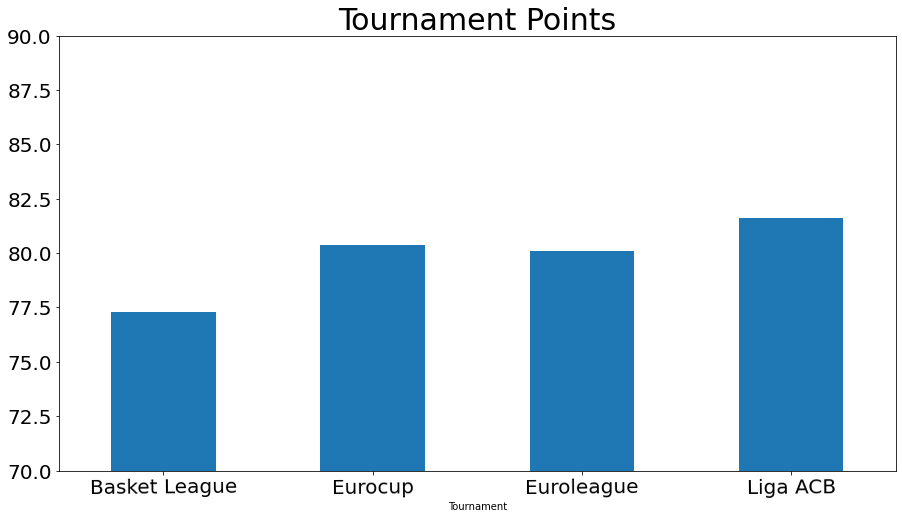

In [53]:
df_agg=final_teams2.groupby([final_teams2['Tournament']]).agg({"Team Points":"mean"})
g=df_agg["Team Points"].groupby(level=0, group_keys=False)
plt.figure(figsize=(15,8))
g.nlargest(1).plot.bar(x='Tournament', y="Team Points",rot=0.5,title="Tournament Points",fontsize=20)
plt.title("Tournament Points",fontsize=30)
plt.ylim(70,90)
plt.show()

In [54]:
df_agg=final_teams2.groupby([final_teams2['Tournament'],final_teams2['Team']]).agg({"teamEDiff":"mean"})
g=df_agg['teamEDiff'].groupby(level=0, group_keys=False)
g.nlargest(5)

Tournament     Team           
Basket League  Olympiacos         27.913817
               Panathinaikos      24.450457
               AEK                10.592646
               PAOK                9.021372
               Aris                8.278972
Eurocup        Khimki             19.812464
               Valencia           19.754165
               Aris               19.478322
               Fuenlabrada        16.062691
               Lokomotiv Kuban    15.278309
Euroleague     CSKA Moscow        17.429308
               Real Madrid        16.478541
               Fenerbahce         11.217957
               Olympiacos         10.780050
               Barcelona           8.731470
Liga ACB       Barcelona          19.120599
               Real Madrid        18.613472
               Valencia           15.580348
               Baskonia           13.646813
               Unicaja Malaga     11.993786
Name: teamEDiff, dtype: float64

In [55]:
df_agg=final_teams2.groupby([final_teams2['Tournament'],final_teams2['Match Date'].dt.year,final_teams2["Winner Team"]]).agg({"Winner Team":"count"})
g=df_agg['Winner Team'].groupby(level=[0,1], group_keys=False)
g.nlargest(1)

Tournament     Match Date  Winner Team    
Basket League  2013        Olympiacos         10
               2014        Panathinaikos      32
               2015        Olympiacos         33
               2016        Olympiacos         35
               2017        Panathinaikos      30
               2018        Panathinaikos      24
Eurocup        2013        Unics Kazan        10
               2014        Khimki             15
               2015        Gran Canaria       19
               2016        Gran Canaria       15
               2017        Lokomotiv Kuban    17
               2018        Darussafaka        11
Euroleague     2013        Olympiacos         10
               2014        Barcelona          25
               2015        CSKA Moscow        25
               2016        CSKA Moscow        27
               2017        CSKA Moscow        26
               2018        Fenerbahce         16
Liga ACB       2013        Real Madrid        13
               2014       

# Save the Data Frame 

In [56]:
final_teams2.to_csv('../data/preprocess_data.csv',sep = ',',index = None, header=True)

# Sample of Data

In [40]:
import pandas as pd
data = pd.read_csv('../data/preprocess_data.csv')
data['Match Date']=pd.to_datetime(data['Match Date'])

In [41]:
data = data.drop(['Winner Team','Winner Home Or Away','Team','Opponent Team'],axis=1)

In [42]:
show_data = data[data['Match Date'].dt.month==10].groupby([data['Match Date'].dt.year,data['Tournament']]).head(1).sort_values(['Tournament','Match Date'])

show_data.rename(columns=lambda c: 'Home ' + c if c.startswith('Team') else c)

,Tournament,Home Team,Away Team,Match Date,Phase,Final Score,Extra Periods,Home Team Points,Home Team Two Pointers Made,Home Team Two Pointers Attempted,...,opptSTL/TO,oppt_Game_Score,Points difference,Finals,Last 32,Playoffs,Quarter-Finals,Regular Season,Semifinals,Top 16
0,Basket League,KAOD,Aris,2013-10-12,Regular Season,58-66,0.0,58.0,20.0,43.0,...,0.571429,39.8,-8.0,0,0,0,0,1,0,0
1166,Basket League,PAOK,Rethymno,2014-10-12,Regular Season,88-79,1.0,88.0,15.0,33.0,...,0.181818,43.4,9.0,0,0,0,0,1,0,0
2247,Basket League,Koroivos,Trikala,2015-10-10,Regular Season,64-73,0.0,64.0,18.0,44.0,...,0.333333,47.8,-9.0,0,0,0,0,1,0,0
3349,Basket League,Doxa Lefkadas,PAOK,2016-10-08,Regular Season,84-78,0.0,84.0,16.0,38.0,...,0.352941,39.4,6.0,0,0,0,0,1,0,0
4256,Basket League,Kolossos Rhodes,Rethymno,2017-10-07,Regular Season,64-63,0.0,64.0,19.0,43.0,...,1.375000,47.0,1.0,0,0,0,0,1,0,0
15,Eurocup,Bonn,Alba Berlin,2013-10-15,Regular Season,65-86,0.0,65.0,14.0,35.0,...,0.333333,72.1,-21.0,0,0,0,0,1,0,0
1177,Eurocup,Gran Canaria,Cantu,2014-10-14,Regular Season,101-81,0.0,101.0,35.0,66.0,...,0.384615,55.9,20.0,0,0,0,0,1,0,0
2260,Eurocup,Le Mans,Gran Canaria,2015-10-13,Regular Season,74-79,0.0,74.0,21.0,45.0,...,0.250000,55.2,-5.0,0,0,0,0,1,0,0
3364,Eurocup,Alba Berlin,Fuenlabrada,2016-10-12,Regular Season,88-81,0.0,88.0,23.0,48.0,...,0.333333,55.6,7.0,0,0,0,0,1,0,0
4272,Eurocup,Ulm,Tofas Bursa,2017-10-10,Regular Season,83-73,0.0,83.0,26.0,45.0,...,0.187500,55.0,10.0,0,0,0,0,1,0,0
